# Template Matching

Temos uma imagem de template `T` e uma imagem `I` onde queremos encontrar esse template.

Percorremos todas as posições `i`, `j` de `I` e comparamos a similaridade (distância) com `T`.

A posição `i`, `j` com a menor distancia, é dada como a posição de `T` em `I`.

In [6]:
%matplotlib inline
from skimage.data import astronaut
import matplotlib.pyplot as plt
import numpy as np

<class 'numpy.ndarray'>
(512, 512, 3)



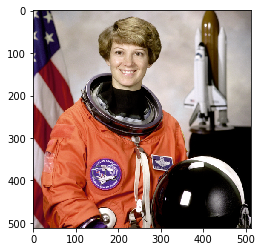

In [7]:
I = astronaut()
print(type(I))
# matriz tridimensional (altura, largura, canais RGB)
print(I.shape)
print()
plt.imshow(I)

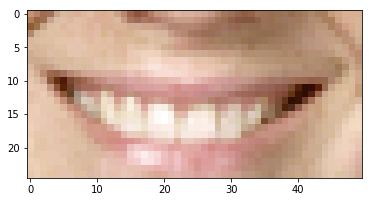

In [45]:
(x, y) = (200, 130)
(w, h) = (50, 25)
T = I[y:y + h, x:x + w]
plt.imshow(T)

In [46]:
def template_matching(T, I):
    (h, w) = I.shape[:2]
    (ch, cw) = T.shape[:2]
    dists = np.zeros((h - ch, w - cw))
    for i in range(h - ch):
        for j in range(w - cw):
            c = I[i:i + ch, j:j + cw]
            dists[i, j] = np.linalg.norm(c - T)
    return dists

130 200 0.0


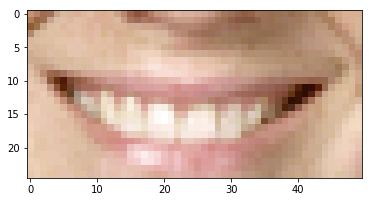

In [47]:
dists = template_matching(T, I)
index = np.argmin(dists)
(i, j) = np.unravel_index(index, dists.shape)
print(i, j, dists[i, j])

(h, w) = T.shape[:2]
crop = I[i:i + h, j:j + w]
plt.imshow(crop)

O que acontece se o template `T` for diferente da imagem de comparação `I` (a imagem tem ruídos/desfoque, por exemplo)?

In [48]:
from skimage.filters import gaussian

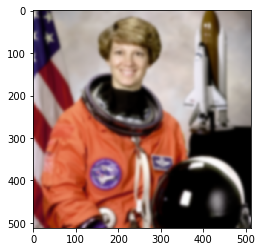

In [50]:
I2 = gaussian(I, sigma=3)
plt.imshow(I2)

190 348 10773.304456109418


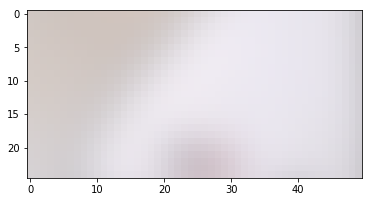

In [58]:
dists = template_matching(T, I2)
index = np.argmin(dists)
(i, j) = np.unravel_index(index, dists.shape)
print(i, j, dists[i, j])

(h, w) = T.shape[:2]
crop = I2[i:i + h, j:j + w]
plt.imshow(crop)

# Sliding window

O template matching faz uso dessa técnica para procurar uma imagem dentro de outra.

Uma sliding window é, simplesmente, percorrer os dados (imagem, texto, série temporal) em partes menores.
Falando em imagens, consiste em passar linha a linha e coluna a coluna com uma largura e altura, como foi feito no tamplate matching.

![](https://www.pyimagesearch.com/wp-content/uploads/2014/10/sliding_window_example.gif)
Fonte da imagem: https://www.pyimagesearch.com/wp-content/uploads/2014/10/sliding_window_example.gif

In [8]:
(w, h) = (100, 100)  # tamanho da janela/parte
for i in range(I.shape[0] - h):  # percorre as linhas da imagem
    for j in range(I.shape[1] - w):  # percorre as colunas da imagem
        parte = I[i:i + h, j:j + w]  # obtém um pedaço da imagem, a "window"
        # faz algo com "parte"

Sliding windows são importantes e poderosas.
Por exemplo, se colocarmos um algoritmo de machine learning dentro da sliding window, podemos fazer detecção de objetos em partes da imagem.

In [9]:
def machine_learning(parte):
    # aqui deveria ter um algoritmo de machine learning para reconhecer padrões
    return bool(np.random.randint(0, 2))


(w, h) = (100, 100)  # tamanho da janela/parte
for i in range(I.shape[0] - h):  # percorre as linhas da imagem
    for j in range(I.shape[1] - w):  # percorre as colunas da imagem
        parte = I[i:i + h, j:j + w]  # obtém um pedaço da imagem, a "window"
        resultado = machine_learning(parte)

Esse mesmo conceito se aplica para textos, onde é possível percorrer um texto em partes de `k` palavras, por exemplo, grupos de 5 palavras por vez.
Da mesma forma, em séries temporais, navegando dia a dia, ou semana a semana.

Outro parâmetro importante para a sliding window é o `padding` que indica o quanto devemos pular em cada etapa.
Por exemplo, em uma imagem, não necessariamente, queremos percorrer pixel a pixel, mas podemos ir de dois em dois para otimizar o tempo.
No caso de séries temporais, o `padding` seria a quantidade de dias entre as partes que coletamos.

In [10]:
padding = 2
(w, h) = (100, 100)  # tamanho da janela/parte
for i in range(0, I.shape[0] - h, padding):  # percorre as linhas da imagem, de 2 em 2
    for j in range(0, I.shape[1] - w, padding):  # percorre as colunas da imagem, de 2 em 2
        parte = I[i:i + h, j:j + w]  # obtém um pedaço da imagem, a "window"
        # faz algo com "parte"

Finalmente, um detalhe importante no processamento de imagens, é que é necessário detectar objetos em diferentes tamanhos (escalas).
Para isso, é necessário redimensionar a imagem antes de percorrer as linhas/colunas.

Por que diminuir a imagem faz a detecção de objetos funcionar em diferentes tamanhos?
Ao diminuir o tamanho da imagem, seria o equivalente a aumentar a area que a `window` passa sobre a imagem.
Assim, a `window` consegue capturar objetos maiores, que antes ficavam fora da sua área.

In [11]:
from skimage.transforms import pyramid_reduce

padding = 2
n_reducoes = 3
(w, h) = (100, 100)  # tamanho da janela/parte
I2 = I
for _ in range(n_reducoes):  # itera por n_reducoes
    for i in range(0, I.shape[0] - h, padding):  # percorre as linhas da imagem, de 2 em 2
        for j in range(0, I.shape[1] - w, padding):  # percorre as colunas da imagem, de 2 em 2
            parte = I[i:i + h, j:j + w]  # obtém um pedaço da imagem, a "window"
            # faz algo com "parte"

    I2 = pyramid_reduce(I2, downscale=2)  # reduz a imagem na metade do tamanho

ModuleNotFoundError: No module named 'skimage.transforms'

# Optical Character Recognition (OCR)

Reconhecimento de caractéres em imagens.

É comum encontrar texto em imagens, ou até mesmo documentos PDF com imagens do texto ao invés do próprio texto.

Se o objetivo é trabalhar com texto, é necessário fazer a extração do texto da imagem.

Para isso, existem as técnicas de OCR que vão desde visão computacional clássica com sliding windows, até redes neurais.

Neste exemplo, vamos utilizar a biblioteca `pytesseract` que utiliza o `tesseract` para extrair texto de imagens.

O `tesseract` éuma ferramenta de terminal (CLI) e pode ser instalado com `apt-get install tesseract-ocr`.

O `pytesseract` permite usar essa ferramenta apartir do python.

In [12]:
from skimage.io import imread
import pytesseract

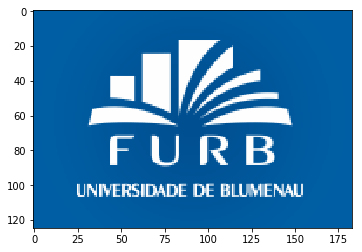

In [13]:
img = imread('http://www.furb.br/web/img/logo-furb.gif')
plt.imshow(img)

In [14]:
pytesseract.image_to_string(img)

'WZ.\nFURB'

O `tesseract` funciona com imagens coloridas, mas de forma geral, uma imagem em preto e branco (tons de cinza) é o suficiente.

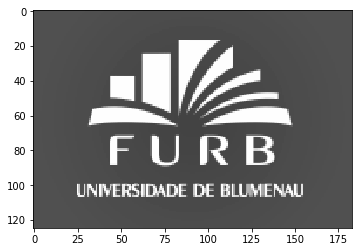

In [15]:
from skimage.color import rgb2grey

img = rgb2grey(img)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

In [16]:
pytesseract.image_to_string(img)

''

Outro detalhe é que o `tesseract` espera o fundo branco e texto preto.

Portanto, precisamos ajustar a imagem.

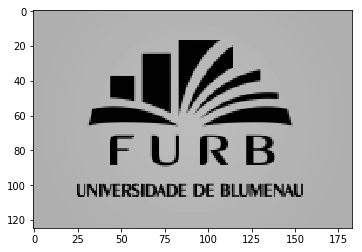

In [17]:
# img, em tons de cinza, tem preto = 0, branco = 1
# os tons de cinza são os valores intermediários
# portanto, img - 1 faz os pixels com valor
# 0 se tornarem -1
# 1 se tornarem 0
# como queremos apenas valores positivos, podemos fazer abs(img - 1)
img = np.abs(img - 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

In [18]:
pytesseract.image_to_string(img)

''

A imagem ainda tem tons de cinza, o que pode dificultar a extração.
A opção, é separar os pixels de fundo (branco) e de texto (preto).
Para isso, temos que fazer todo o fundo = 1 (branco) e todo o texto = 0 (preto).

Uma opção para isso, é definir um limiar ( _threshold_ ) e fazer
`img[img > limiar] = 1` e `img[img <= limiar] = 0`.
Entretanto, encontrar o _threshold_ de separação pode ser difícil e para isso existem algumas rotinas que podem ajudar.

In [19]:
from skimage.filters import threshold_otsu

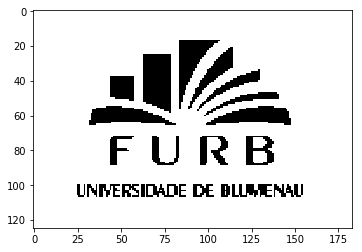

In [20]:
t = threshold_otsu(img)
img[img > t] = 1
img[img <= t] = 0
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

In [21]:
pytesseract.image_to_string(img)

'az\nFURB'

In [26]:
# outro ponto que pode impactar, é o idioma
# pode ser necessário executar apt-get install tesseract-ocr-por
# para reconhecer texto em português
pytesseract.image_to_string(img, lang='por')

'EUA\nFURB'

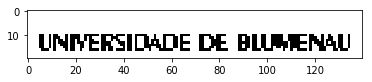

In [27]:
# e se passar apenas a linha do texto "UNIVERSIDADE DE BLUMENAU"?
subimg = img[90:110, 20:160]
plt.imshow(subimg, cmap='gray', vmin=0, vmax=1)

In [28]:
pytesseract.image_to_string(subimg, lang='por')

'UNIVERSIDADE DE PIUMENAL!'